# MLP

## Table of Contents
- [Display the Number of Columns](#display-the-number-of-columns)
- [Correlation Matrix](#correlation-matrix)
- [Draw Diagram](#draw-diagram)
- [Data Preprocessing](#data-preprocessing)
- [Model Implementation](#model-implementation)
- [Model Training](#model-training)
- [Results Anallysis](#results-anallysis)
- [References](#references)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [3]:
df = pd.read_csv("../data/Question4.csv")

## Display the Number of Columns


In [6]:
nan_counts = df.isna().sum()
nan_counts_df = pd.DataFrame(nan_counts, columns=['NaN Counts']) 
print(tabulate(nan_counts_df, headers='keys', tablefmt='pretty'))

+---------------+------------+
|               | NaN Counts |
+---------------+------------+
|      id       |     0      |
|     date      |     0      |
|     price     |     0      |
|   bedrooms    |     0      |
|   bathrooms   |     0      |
|  sqft_living  |     0      |
|   sqft_lot    |     0      |
|    floors     |     0      |
|  waterfront   |     0      |
|     view      |     0      |
|   condition   |     0      |
|     grade     |     0      |
|  sqft_above   |     0      |
| sqft_basement |     0      |
|   yr_built    |     0      |
| yr_renovated  |     0      |
|    zipcode    |     0      |
|      lat      |     0      |
|     long      |     0      |
| sqft_living15 |     0      |
|  sqft_lot15   |     0      |
+---------------+------------+


## Correlation Matrix


In [7]:
def plot_correlation_matrix(df, exception_columns=[]): 
    numeric_fields = df.select_dtypes(include=['number']).columns.tolist() 
    numeric_fields = [col for col in numeric_fields if col not in exception_columns] 
    df_selected = df[numeric_fields] 
    corr_matrix = df_selected.corr() 
    plt.figure(figsize=(12, 8)) 
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True) 
    plt.title("Correlation Matrix Heatmap") 
    plt.show()

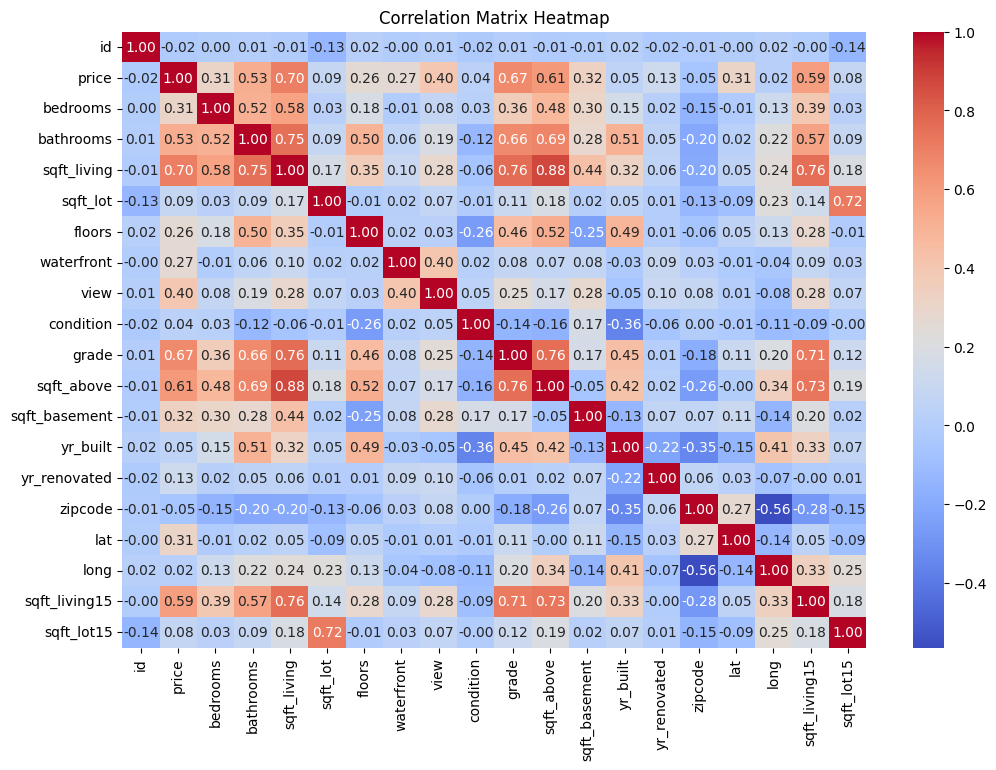

In [8]:
plot_correlation_matrix(df)

## Draw Diagram


## Data Preprocessing


## Model Implementation


## Model Training


## Results Anallysis

## References

- [Ref1]()
- [Ref2]()
- [Ref3]()